# SQRA with Lennar Jones Clusters - Convergence analysis

## The Setup
We start with a (1) simulation of a trajectory of the Lennard Jones cluster dynamics for 3 Particles in 2-Space.
The resulting points will be used for a subsampling procedure to obtain the cells for the SQRA.
There are two options:
- The Picking algorith: \
	Pick iteratively the point farthest from all previously picked points. For the adjacency matrix required for the SQRA we use a heuristic to match an expected average number of neighbours by a distance threshold. The Volumes and Areas of the cells are assumed to be uniform.

- Sparse Boxes: \
	We cover the trajectory with a grid of regular boxes. In this regime the adjacency is clear and volumes and areas are constant.
	For the estimation of the (assumedly constant) potential in each box we use the minimum of the correspoding samples.

### Postprocessing of the SQRA:
In order to obtain a 'nice' generator matrix we prune states with outbound rates above a certain thresholds and afterwards (unconnected) states without incoming rates.

## Committor computation
Based on the relative angles of the 3 particles we classify the states into the states: right oriented, left oriented, unoriented.
We then compute the committor function between the left and right orientations.

## Convergence analysis
In order to analyse the convergence of the SQRA we compute the committors for different levels of the sparse box discretization.
We then compute the distances of the committors (of different resolutions) with the finest committor.

For the distance we use the MSE on the support of the finest discretization.

In [1]:
using Revise
using Sqra
using Plots
using Arpack
using LinearAlgebra, Random
plotly(fmt=:png)

┌ Info: Precompiling Sqra [561b40b7-a0ab-4084-b14c-be45599a2ca9]
└ @ Base loading.jl:1342


Plots.PlotlyBackend()

# Simulation

We start by simulation a long trajectory to explore the state space.
We use these samples as a basis for either subsampling with the picking algorithm (`:voronoi`)
or for selecting the sparse boxes for a given discretization level (`ncells` in each direction)

In [3]:
#Random.seed!(0)
sim = Sqra.run(Sqra.Simulation(nsteps=2_00_000, sigma=.5, maxdelta=0.01))

┌ Warning: skipping callee ##discretize_unmemoized (called by false) due to UndefVarError(Symbol("#75#76"))
└ @ LoweredCodeUtils /Users/alex/.julia/packages/LoweredCodeUtils/TH1qS/src/signatures.jl:279
Euler Maruyama simulation100%|██████████████████████████| Time: 0:00:04


Sqra.Simulation
  x0: Array{Float64}((6,)) [0.19920158482463968, 0.13789462153196408, -0.1709575705426315, 0.0784533378749835, 0.06778720715969005, -0.2112155752270007]
  epsilon: Int64 1
  r0: Float64 0.3333333333333333
  harm: Int64 1
  sigma: Float64 0.5
  dt: Float64 0.001
  nsteps: Int64 200000
  maxdelta: Float64 0.01
  seed: Int64 1
  x: Array{Float64}((6, 200001)) [0.19920158482463968 0.20334321106184075 … -0.43552548382963097 -0.4372706453355529; 0.13789462153196408 0.14416632237604463 … 0.11124079914639617 0.10411705972355968; … ; 0.06778720715969005 0.053788009335393364 … -0.19697775749822027 -0.20629905917089664; -0.2112155752270007 -0.20596632763897224 … -0.21713865385246287 -0.22042832878721363]
  u: Array{Float64}((200001,)) [-2.855863452445878, -2.7899344658297394, -2.0767964628456994, -2.5162026486957334, -1.9093244422591116, -2.497324108443748, -1.832143301058364, -2.590330530155494, -2.8187991969167467, -2.440502092161658  …  -2.6463758162232, -2.5134153570746256, -2

In [4]:
r = Sqra.discretize(Sqra.SpBoxDiscretisation(ncells=15, prune=Inf), sim)

LoadError: UndefVarError: t not defined

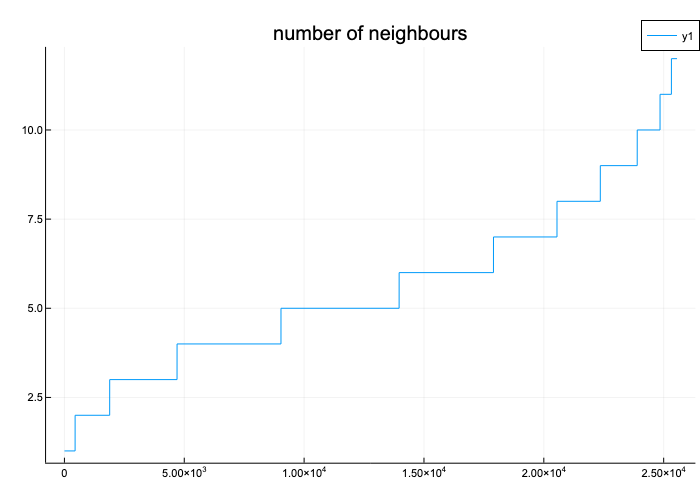

In [255]:
plot(sum(r.Q .> 0, dims=1)|>vec|>sort, title="number of neighbours")

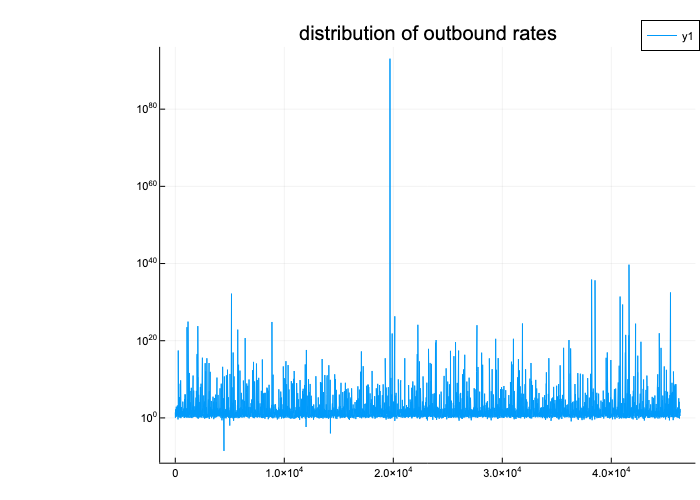

In [367]:
plot(-diag(r.Q), yaxis=:log, title="distribution of outbound rates")

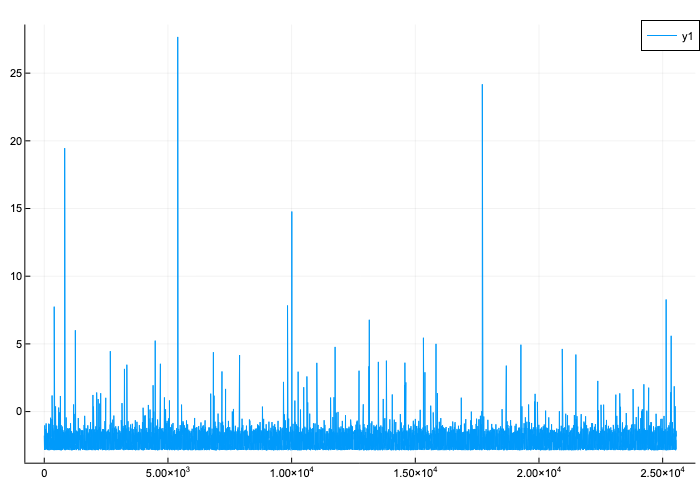

In [257]:
plot(r.u)

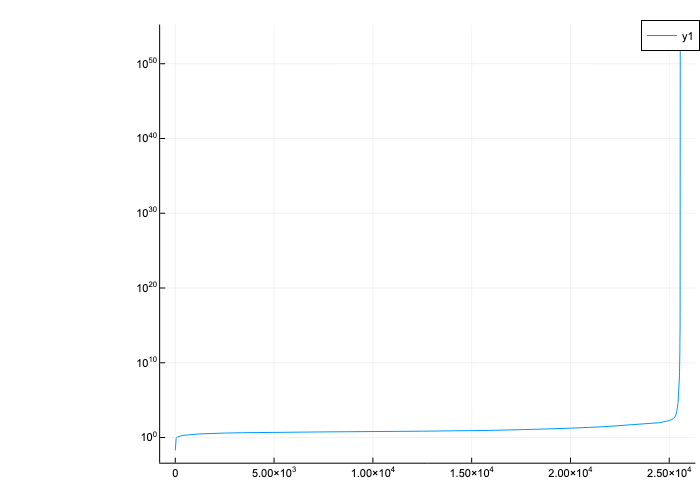

In [258]:
plot((sort(-diag(r.Q))), yaxis=:log)

In [342]:
println("size of system")
length(r.Q.nzval), size(r.Q)

size of system


(302178, (46326, 46326))

In [287]:
@time c=Sqra.committor(r, Sqra.gmres, precondition=false, maxiter=10000)



Committor residual: 1.6564191232297353e71
 24.276351 seconds (818.05 k allocations: 67.100 MiB)


(
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿, [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0  …  0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0])

# Analysis of committor solver convergence

We compare different solvers for the linear system, as well as the solutions of a more pruned system.
Pruning is mainly there to enable solution of the linear committor system.
On the other hand iterative solvers might maybe help to compute ill conditioned systems?
After all the large outbound rates should not play a role in the computation.
We might as well try preconditioning with the diagonal rates!

In [408]:
c = @time Sqra.committor(r, maxiter=10000)

Committor residual: 1.6063952331982113e82
  5.748965 seconds (835.08 k allocations: 70.081 MiB, 1.14% gc time, 0.31% compilation time)


46326-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.9999999999868403
 1.0
 1.0
 0.0
 0.0409207149518804
 0.9999999999868395
 1.0
 0.0
 1.0
 1.0
 ⋮
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0

beta = Sqra.sigma_to_beta(sim.sigma) = 8.0


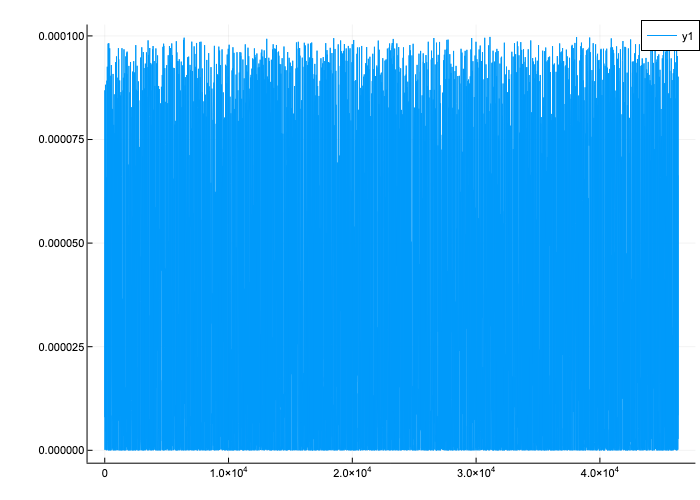

In [400]:
@show beta = Sqra.sigma_to_beta(sim.sigma)

stat = stat / sum(stat)
plot(stat)

In [412]:
A, b = Sqra.committor_system(r.Q, Sqra.classify(r.picks))

sqrt(sum(abs2, (A*c - b)[abs.(diag(r.Q))  .< 1e5]))



0.00021935807159326738

# Taking a look at committor solution

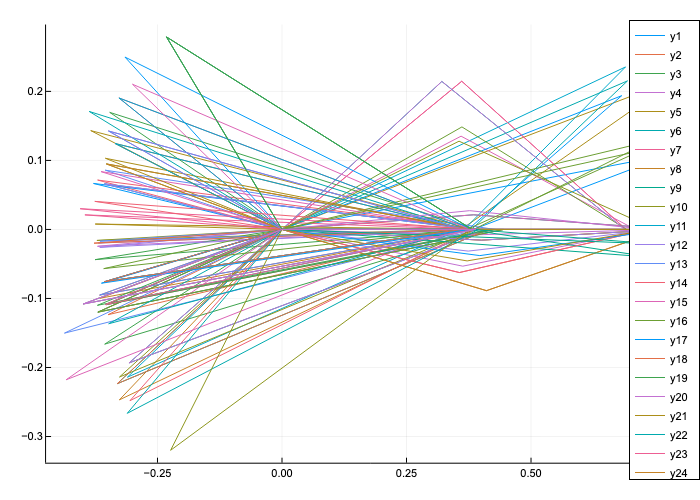

In [418]:
# plot states with a committor value in the defined range
transind = rand(findall((0.4 .<c.<0.6)), 100)
plot()
Sqra.plot_triangles!(Sqra.normalform(r.picks[:, transind]))

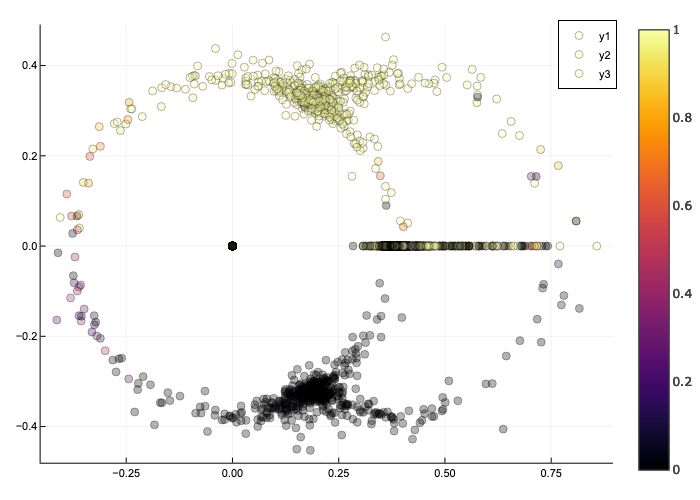

  5.695562 seconds (1.94 M allocations: 121.154 MiB, 2.82% gc time)


In [424]:
# plot the rotated and translated normal form of the LJ clusters and color by committor

plot()
plotint = 1:30:size(r.picks,2)
color = c
let points = r.picks[:, plotint], col = c[plotint]
#let points = r.picks[:, pinds], col = x
	@time Sqra.plot_trajectories(Sqra.normalform(points), alpha=0.3, marker_z=col) |> display;
end 

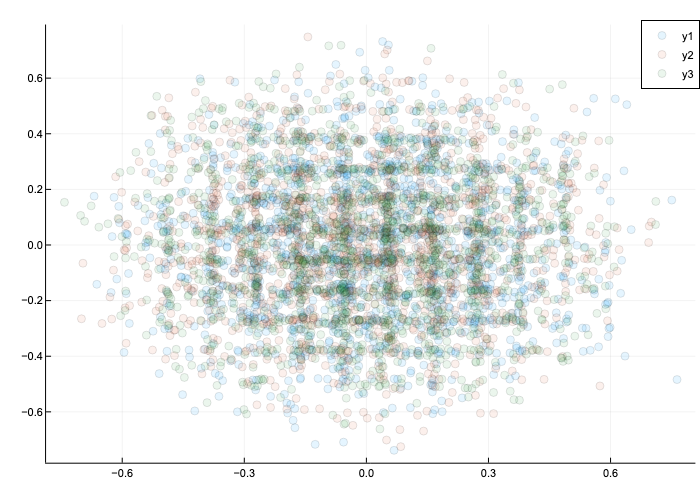

  0.669133 seconds (257.25 k allocations: 12.285 MiB)


In [425]:
# plot the JL cluster states in original coordinates
plot();
@time Sqra.plot_trajectories(r.picks[:,plotint], alpha=0.1) |> display;
#plot_trajectories(r.x[:,1:end], alpha=0.01, markersize=0.5)

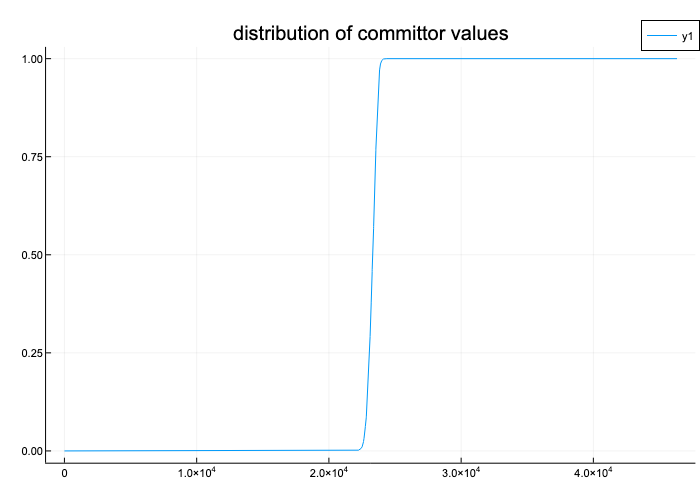

In [426]:
plot(c|>sort, title="distribution of committor values")

# Convergence of committors


In [439]:
runs = []

levels=3:14

for ncells in levels
	r = Sqra.discretize(Sqra.SpBoxDiscretisation(ncells=ncells), sim)
	c = Sqra.committor(r)
	push!(runs, (c=c, r=r))
end

sparse box picking100%|█████████████████████████████████| Time: 0:00:00


length(picks) = 302
  1.576224 seconds (8.01 M allocations: 1009.096 MiB, 19.56% gc time)
  0.000097 seconds (56 allocations: 206.656 KiB)
sparsity: 302/729=0.41426611796982166
pruned 0 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 2.617969255294855e-7


sparse box picking100%|█████████████████████████████████| Time: 0:00:00


length(picks) = 823
  1.680655 seconds (8.02 M allocations: 1010.047 MiB, 36.95% gc time)
  0.000520 seconds (76 allocations: 573.219 KiB)
sparsity: 823/4096=0.200927734375
pruned 1 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 7.420486289761561e-6


sparse box picking100%|█████████████████████████████████| Time: 0:00:01


length(picks) = 2111
  1.347324 seconds (8.06 M allocations: 1012.057 MiB, 12.87% gc time)
  0.001147 seconds (94 allocations: 1.483 MiB)
sparsity: 2111/15625=0.135104
pruned 1 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 0.349820256319275


sparse box picking100%|█████████████████████████████████| Time: 0:00:00


length(picks) = 3231
  1.078056 seconds (8.09 M allocations: 1014.216 MiB, 15.10% gc time)
  0.001769 seconds (94 allocations: 2.128 MiB)
sparsity: 3231/46656=0.06925154320987655
pruned 2 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 81.2795122200061


sparse box picking100%|█████████████████████████████████| Time: 0:00:00


length(picks) = 5006
  1.137177 seconds (8.13 M allocations: 1016.546 MiB, 13.98% gc time)
  0.002840 seconds (94 allocations: 3.303 MiB)
sparsity: 5006/117649=0.04255029792008432
pruned 7 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 13058.232566078515


sparse box picking100%|█████████████████████████████████| Time: 0:00:00


length(picks) = 8236
  1.068394 seconds (8.22 M allocations: 1021.868 MiB, 12.53% gc time)
  0.004811 seconds (94 allocations: 5.593 MiB)
sparsity: 8236/262144=0.0314178466796875
pruned 11 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 4.65481039347712e14


sparse box picking100%|█████████████████████████████████| Time: 0:00:00


length(picks) = 12017
  1.194338 seconds (8.32 M allocations: 1.006 GiB, 14.23% gc time)
  0.007626 seconds (94 allocations: 8.130 MiB)
sparsity: 12017/531441=0.02261210557710075
pruned 9 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 3.663244400001342e7


sparse box picking100%|█████████████████████████████████| Time: 0:00:00
collecting neighbours100%|██████████████████████████████| Time: 0:00:00


length(picks) = 14960
  1.156066 seconds (8.40 M allocations: 1.009 GiB, 10.02% gc time)
  0.009082 seconds (94 allocations: 9.929 MiB)
sparsity: 14960/1000000=0.01496
pruned 12 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 9.934382713878126e9


sparse box picking100%|█████████████████████████████████| Time: 0:00:00
collecting neighbours100%|██████████████████████████████| Time: 0:00:00


length(picks) = 18808
  1.298970 seconds (8.50 M allocations: 1.014 GiB, 10.95% gc time)
  0.011103 seconds (94 allocations: 12.425 MiB)
sparsity: 18808/1771561=0.010616625676451446
pruned 14 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 1.5408197831039995e23


sparse box picking100%|█████████████████████████████████| Time: 0:00:00
collecting neighbours100%|██████████████████████████████| Time: 0:00:00


length(picks) = 25587
  1.607639 seconds (8.69 M allocations: 1.025 GiB, 7.85% gc time)
  0.016329 seconds (94 allocations: 17.281 MiB)
sparsity: 25587/2985984=0.008569034529320988
pruned 30 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 1.4130978161128782e44


sparse box picking100%|█████████████████████████████████| Time: 0:00:00
collecting neighbours100%|██████████████████████████████| Time: 0:00:00


length(picks) = 33859
  2.107091 seconds (8.91 M allocations: 1.036 GiB, 8.13% gc time)
  0.023145 seconds (94 allocations: 23.143 MiB)
sparsity: 33859/4826809=0.007014779329366462
pruned 56 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 3.440178412425239e14


sparse box picking100%|█████████████████████████████████| Time: 0:00:00
collecting neighbours100%|██████████████████████████████| Time: 0:00:00


length(picks) = 39616
  2.257728 seconds (9.06 M allocations: 1.043 GiB, 7.77% gc time)
  0.027511 seconds (94 allocations: 26.510 MiB)
sparsity: 39616/7529536=0.00526141318668242
pruned 86 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 1.3249481863762933e21


In [448]:
@timed arst=1

(value = 1, time = 4.68e-7, bytes = 0, gctime = 0.0, gcstats = Base.GC_Diff(0, 0, 0, 0, 0, 0, 0, 0, 0))

In [440]:
_c = runs[end].c
_carts = runs[end].r.cartesians
_ncells = runs[end].r.ncells

conv = map(runs) do run
	c = run.c
	carts = run.r.cartesians
	ncells = run.r.ncells

	@time Sqra.sp_mse(c, _c, carts, _carts, ncells,  _ncells)
end

  0.373202 seconds (58 allocations: 9.650 MiB)
  1.159232 seconds (60 allocations: 9.697 MiB)
  2.655866 seconds (63 allocations: 12.815 MiB)
  3.880528 seconds (63 allocations: 12.917 MiB)
  6.675208 seconds (57 allocations: 7.079 MiB)
 10.823237 seconds (63 allocations: 13.375 MiB)
 15.541041 seconds (66 allocations: 19.721 MiB)
 20.214089 seconds (69 allocations: 31.990 MiB)
 24.176568 seconds (69 allocations: 32.342 MiB)
 32.126378 seconds (66 allocations: 20.962 MiB)
 44.518748 seconds (69 allocations: 33.717 MiB, 0.24% gc time)
 51.232439 seconds (57 allocations: 10.241 MiB)


12-element Vector{Float64}:
 0.001330159604197773
 0.0006731374459844875
 0.00033544859313951956
 6.248966342514699e-5
 3.265116154669092e-5
 2.371333670218967e-5
 1.849818472545362e-5
 1.0632925442018026e-5
 9.041481896453018e-6
 7.188435254123057e-6
 4.77024840198255e-6
 0.0

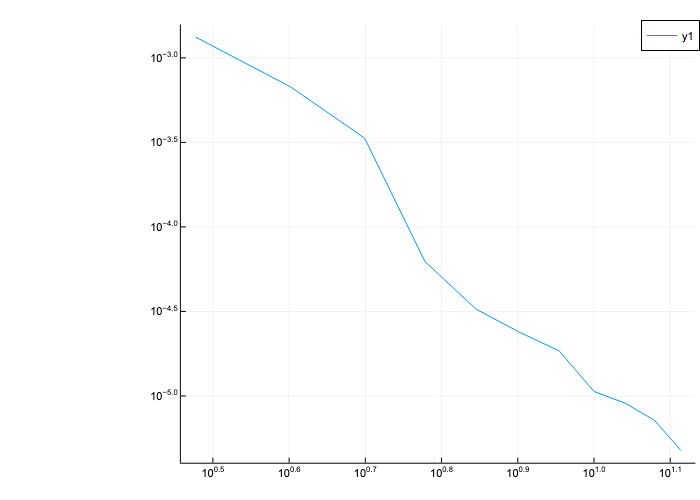

In [446]:
plot(levels[1:end-1],conv[1:end-1], yaxis=:log, xaxis=:log)

In [465]:
string(hash(_c))

"17991745853457137958"

In [468]:
]resolve

  No Changes to `~/Documents/code/sqra.jl/notebooks/Project.toml`
    Updating `~/Documents/code/sqra.jl/notebooks/Manifest.toml`
  [5789e2e9] + FileIO v1.10.1
  [033835bb] + JLD2 v0.4.13


In [500]:
@time Sqra.batch(levels=3:5);

Euler Maruyama simulation100%|██████████████████████████| Time: 0:00:03


length(picks) = 141
  0.045730 seconds (403.38 k allocations: 50.648 MiB)
  0.000053 seconds (56 allocations: 84.750 KiB)
sparsity: 141/729=0.1934156378600823
pruned 0 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 1.915255390092325e-14
length(picks) = 399
  0.059787 seconds (409.62 k allocations: 51.022 MiB)
  0.000160 seconds (58 allocations: 250.062 KiB)
sparsity: 399/4096=0.097412109375
pruned 0 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 9.006566264039447e-10
length(picks) = 856
  0.056056 seconds (421.42 k allocations: 51.872 MiB)
  0.000708 seconds (76 allocations: 542.406 KiB)
sparsity: 856/15625=0.054784
pruned 6 large outbound rates / unconnecteds
pruned 0 states without incoming rates
Committor residual: 1.199040866595169e-14
  4.252783 seconds (24.34 M allocations: 3.345 GiB, 22.49% gc time)


In [498]:
Sqra.jldopen("3.jld2") |>close

# Convergence of picking, Part 1
We analyse how the number of boxes increases with growing sample size and resolution

In [251]:
]add Parameters

   Resolving package versions...
    Updating `~/Documents/code/sqra.jl/notebooks/Project.toml`
  [d96e819e] + Parameters v0.12.2
  No Changes to `~/Documents/code/sqra.jl/notebooks/Manifest.toml`
Precompiling project...
  ✓ SparseMatricesCSR
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  ✗ Sqra
  4 dependencies successfully precompiled in 49 seconds (151 already precompiled)
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package


sparse box picking100%|█████████████████████████████████| Time: 0:00:04


length(picks) = 713


sparse box picking100%|█████████████████████████████████| Time: 0:00:04


length(picks) = 3204


sparse box picking100%|█████████████████████████████████| Time: 0:00:04


length(picks) = 9194


sparse box picking100%|█████████████████████████████████| Time: 0:00:04
collecting neighbours100%|██████████████████████████████| Time: 0:00:00


length(picks) = 20183


sparse box picking100%|█████████████████████████████████| Time: 0:00:04
collecting neighbours100%|██████████████████████████████| Time: 0:00:05


length(picks) = 69151


sparse box picking100%|█████████████████████████████████| Time: 0:00:04
collecting neighbours100%|██████████████████████████████| Time: 0:00:27


length(picks) = 160135


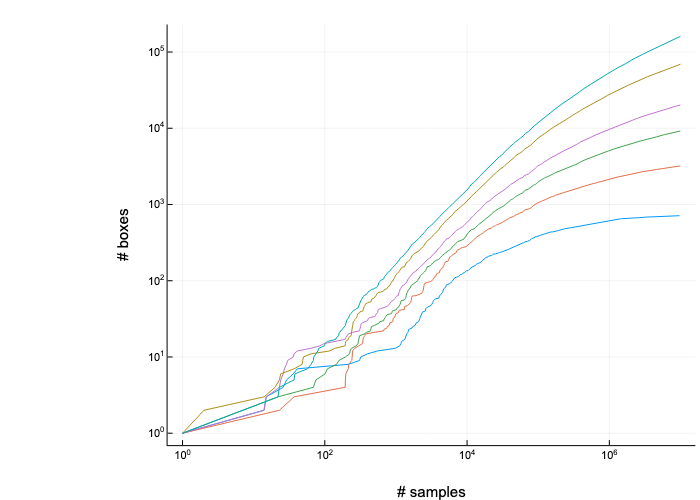

In [21]:
plot()
for n in [3,4,5,6,8,10]
    _, _, order = Sqra.sparseboxpick(r.x, n, ones(size(r.x,2)), r.boundary)
    plot!(order, 1:length(order), )
    accel =  (order[end]-order[end-10]) / 10
    #println(" $(length(order)/size(r.x, 2)  / accel * 100) % verbesserung pro prozent ")
end
plot!(legend=false, xlabel="# samples", ylabel="# boxes", yaxis=:log, xaxis=:log)

# --- OLD SNIPPETS --- #

# Generator preprocessing

In [9]:
cutoff = 3
prune = Inf

Q, pinds = Sqra.prune_Q(r.Q,Inf)

Q.nzval[Q.nzval.>cutoff] .= cutoff
Q = Sqra.fixdiagonal(Q)

pruned 0 large outbound rates
pruned 0 states without incoming rates


12541×12541 SparseArrays.SparseMatrixCSC{Float64, Int64} with 99367 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣏⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

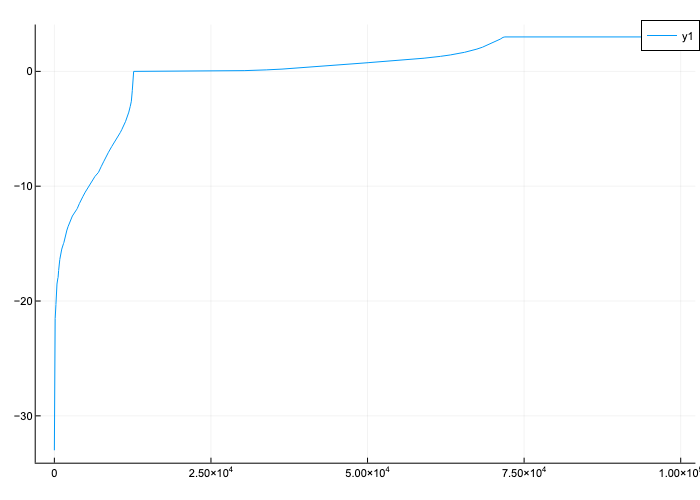

In [10]:
plot((Q.nzval|>sort))

# Committor convergence

In [11]:
Sqra.solve_committor(Q, r.classes[pinds])

LoadError: SingularException(0)

# Spectrum

In [12]:
@time evals, evecs = eigs(Q, which=:LR, maxiter=10000, tol=10)

  2.087857 seconds (4.48 M allocations: 273.488 MiB, 19.26% gc time, 99.05% compilation time)


(ComplexF64[-0.1475671764122306 + 0.0im, -0.7966261258484162 + 0.0im, -1.8944664837860472 + 0.0im, -3.2074719257932913 + 0.0im, -4.4945711114892735 + 0.0im, -6.043124274587199 + 0.0im], ComplexF64[-0.010705250976983669 + 0.0im 0.005518016661157727 + 0.0im … -0.0028558517423887216 + 0.0im 0.0034931182286626673 + 0.0im; -0.013898116354586501 + 0.0im 0.014670317939690276 + 0.0im … 0.002544949149689466 + 0.0im 0.0038144768680137583 + 0.0im; … ; -0.006333613260688547 + 0.0im 0.0045137213484804165 + 0.0im … -0.01626068251582685 + 0.0im -0.002602216051200564 + 0.0im; -0.0081162657879794 + 0.0im 0.001858681185873747 + 0.0im … -0.006749717318176673 + 0.0im 4.865746648047894e-5 + 0.0im], 6, 1, 20, [0.028421907389718715, -0.06938841874877381, -0.1473804498062421, -0.0828561532112862, -0.01905168086002779, 0.0635233506375137, -0.012358328049129638, 0.0400340581663493, -0.008171478918241487, 0.012414471024498887  …  0.015843549068211803, 0.04284768069297001, 0.026374072595923958, 0.0204594852064038

In [13]:
evals

6-element Vector{ComplexF64}:
 -0.1475671764122306 + 0.0im
 -0.7966261258484162 + 0.0im
 -1.8944664837860472 + 0.0im
 -3.2074719257932913 + 0.0im
 -4.4945711114892735 + 0.0im
  -6.043124274587199 + 0.0im

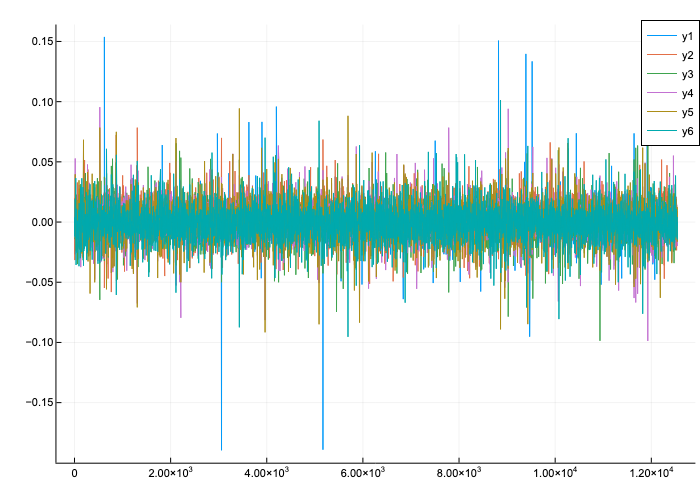

In [14]:
plot(evecs[:,:].|>real)
#plot!(r.classes, alpha=0.5)

# Cell analysis

In [15]:
prob = argmin(diag(r.Q))

5497

In [16]:
@show r.Q[prob,:]
neighs = r.Q[prob,:].nzind;

r.Q[prob, :] =   [416  ]  =  2.85995e291
  [4626 ]  =  3.54671e291
  [4845 ]  =  1.22278e289
  [5497 ]  =  -1.24125e292
  [5541 ]  =  2.51031e291
  [6510 ]  =  5.78385e289
  [10105]  =  3.37218e291
  [11683]  =  5.32815e289


In [17]:
@show r.us[prob]
r.us[neighs]

r.us[prob] = 165.02666398119146


8-element Vector{Float64}:
  -2.7491025397060844
  -2.802906371254066
  -1.385390370968821
 165.02666398119146
  -2.7165030890058035
  -1.7738762209598666
  -2.7902916316770408
  -1.753360044275069

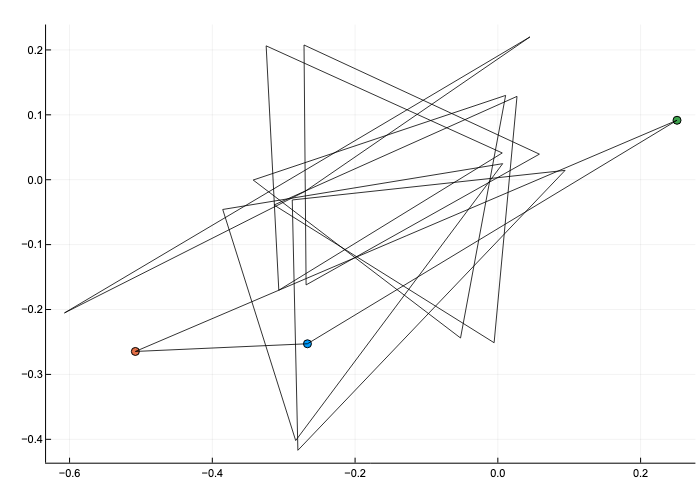

In [18]:
plot(); Sqra.plot_trajectories(r.picks[:,prob])
Sqra.plot_triangles!(r.picks[:, neighs], color=:black, alpha=0.8, legend=false)

# Spectrum again

In [19]:
evals, evecs = eigs(r.Q, which=:SM, nev=6)#, check=0, maxiter=1000, tol=0)
evecs = real.(evecs)
evals

LoadError: SingularException(0)

In [20]:
evecs

12541×6 Matrix{ComplexF64}:
   -0.0107053+0.0im   0.00551802+0.0im  …   0.00349312+0.0im
   -0.0138981+0.0im    0.0146703+0.0im      0.00381448+0.0im
  -0.00307447+0.0im    0.0039833+0.0im      -0.0106567+0.0im
  -0.00955884+0.0im   0.00317276+0.0im      0.00738616+0.0im
  -0.00545934+0.0im   0.00876829+0.0im      -0.0120584+0.0im
   0.00705766+0.0im    0.0200365+0.0im  …  -0.00422746+0.0im
   -0.0267979+0.0im   -0.0315819+0.0im      0.00381682+0.0im
   0.00276322+0.0im   0.00588531+0.0im      0.00104372+0.0im
  -0.00595206+0.0im   0.00290616+0.0im      0.00480697+0.0im
  -0.00392029+0.0im    0.0111989+0.0im     -0.00169179+0.0im
  -0.00501349+0.0im   0.00316529+0.0im  …  -0.00280449+0.0im
  -0.00598821+0.0im   0.00300475+0.0im     -0.00490362+0.0im
   -0.0111979+0.0im   0.00446742+0.0im       0.0188605+0.0im
             ⋮                          ⋱             ⋮
  -0.00821513+0.0im    0.0102204+0.0im     -0.00967229+0.0im
   -0.0058193+0.0im  -4.95268e-5+0.0im  …  -5.47581e-5+0.0im
 

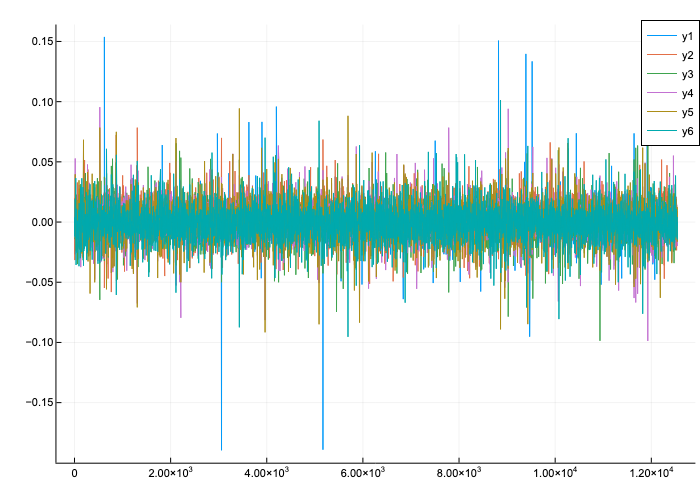

In [21]:
plot(real.(evecs))

In [22]:
step=100
for evec in 1:length(evals)

    col = real.(evecs[:,evec])[1:step:end]
    data = center[:,1:step:end]
    plot();
    plot_trajectories(normalform(data), alpha=0.3, marker_z=col, clims=(-1,1).*std(col), seriescolor=:bwr) |> display

    scatter(data[1,:], data[2,:], alpha=0.3, marker_z=col, clims=(-1,1).*std(col), seriescolor=:bwr) |> display
end

LoadError: MethodError: no method matching axes(::typeof(center), ::Int64)
[0mClosest candidates are:
[0m  axes([91m::RecipesPipeline.Volume[39m, ::Any...) at /Users/alex/.julia/packages/RecipesPipeline/a80Nu/src/utils.jl:108
[0m  axes([91m::Base.Broadcast.Broadcasted{var"#s832", var"#s831", F, Args} where {var"#s832", var"#s831"<:(Tuple{Vararg{T, N}} where T), F, Args<:Tuple}[39m, ::Integer) where N at broadcast.jl:212
[0m  axes([91m::Number[39m, ::Integer) at number.jl:81
[0m  ...